In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [10]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.structured import *

In [2]:

from pathlib import Path
import pandas as pd

In [171]:
PATH = Path('data/competitions/avito-demand-prediction')
TRATH = PATH/'train'
TEATH = PATH/'test'
list(TRATH.iterdir())

[PosixPath('data/competitions/avito-demand-prediction/train/train_active.csv'),
 PosixPath('data/competitions/avito-demand-prediction/train/train.csv'),
 PosixPath('data/competitions/avito-demand-prediction/train/periods_train.csv'),
 PosixPath('data/competitions/avito-demand-prediction/train/jpg')]

In [1]:
table_names = ['train', 'train_active', 'periods_train']

In [172]:
test = pd.read_csv(TEATH/f'test.csv', low_memory=False)

In [5]:
tables = [pd.read_csv(TRATH/f'{name}.csv', low_memory=False) for name in table_names]

In [7]:
from IPython.display import HTML

In [8]:
for t in tables: display(t.head())

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type
0,70d6342079ef,11d4c04d8c51,Нижегородская область,Нижний Новгород,Хобби и отдых,Книги и журналы,Книги,NaN,NaN,Детская знциклопедия,"детская энциклопедия,10 томов, в книге 630 стр...",200.0,20.0,2017-03-15,Private
1,97cf505710e1,d7068c60b2c6,Воронежская область,Воронеж,Недвижимость,Гаражи и машиноместа,Продам,Гараж,Кирпичный,"Гараж, > 30 м²","Продается ГАРАЖ в ПГСК Алмаз/\nУдобный въезд, ...",590000.0,23.0,2017-03-27,Private
2,6a93a31a945d,755c88999bc7,Нижегородская область,Нижний Новгород,Недвижимость,Коммерческая недвижимость,Сдам,Торговое помещение,NaN,"Торговое помещение, 50-5000 м²",Сдаем в аренду лучшие торговые помещения Н.Нов...,100000.0,4.0,2017-03-15,Private
3,050cade37667,3d7fb2abdbbc,Башкортостан,Стерлитамак,Бытовая электроника,Телефоны,Аксессуары,Аккумуляторы,NaN,Аккумулятор на 5s / 5c,"продам батарею на iphone 5s , 5с",750.0,157.0,2017-03-15,Company
4,2935e85aa40b,fc1be1a809d1,Татарстан,Казань,Для дома и дачи,Ремонт и строительство,Камины и обогреватели,NaN,NaN,"Заглушки, дверцы, плита","Всё для печи: плита, заглушка, дверцы- всё нов...",3900.0,27.0,2017-03-15,Private


,item_id,activation_date,date_from,date_to
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28


In [11]:
for t in tables: display(DataFrameSummary(t).summary())

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.41806e+06,1.50342e+06,NaN,NaN,NaN,1.39084e+06,1.50342e+06
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,316708,743.674,NaN,NaN,NaN,1241.93,0.139131
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.68915e+07,5572.52,NaN,NaN,NaN,970.464,0.260079
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaN,0,0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,9,NaN,NaN,NaN,425,0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300,29,NaN,NaN,NaN,1057,0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000,88,NaN,NaN,NaN,2217,0.15087
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9501e+10,204429,NaN,NaN,NaN,3066,1
counts,1503424,1503424,1503424,1503424,1503424,1503424,1441848,848882,640859,1503424,1387148,1418062,1503424,1503424,1503424,1390836,1390836,1503424
uniques,1503424,771769,28,1733,9,47,371,271,1219,788377,1317102,17006,28232,21,3,1390836,3062,18407


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type
count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.37776e+07,1.40055e+07,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,585062,465.591,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.39279e+08,3605.55,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400,12,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,37,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000,109,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1e+12,204404,NaN,NaN
counts,14129821,14129821,14064285,14064285,14064285,14064284,13513497,8086250,5951345,14063264,13534224,13777564,14005498,14005498,14005498
uniques,13812591,3189729,29,1783,10,47,376,296,1668,6580172,12853945,62213,57611,13,3


,item_id,activation_date,date_from,date_to
count,16687412,16681622,16687412,16687412
unique,13812546,87,14,14
top,c5bc9e0c5700,2017-03-13,2017-03-15,2017-03-28
freq,14,539502,12070638,11221144
counts,16687412,16681622,16687412,16687412
uniques,13812546,87,14,14
missing,0,5790,0,0
missing_perc,0%,0.03%,0%,0%
types,categorical,categorical,categorical,categorical


In [12]:
train, active, periods = tables

In [ ]:
train.groupby()

In [20]:
train['with_image'] = train['image'].notnull()

with_image
False    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
True     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

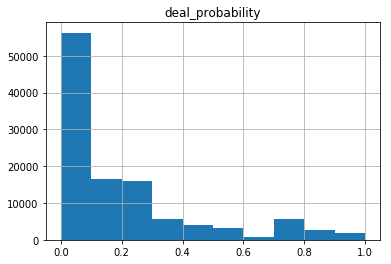

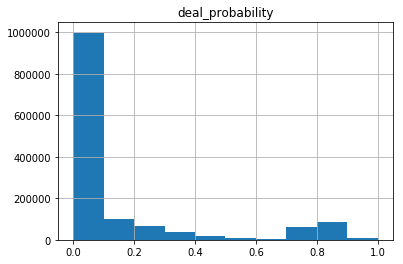

In [42]:
gg = train[['with_image', 'deal_probability']].groupby('with_image')
gg.hist()

([array([ 40732.,    302.,    154.,    699.,    307.,    579.,   1060.,    714.,    405.,    332.]),
  array([ 933987.,    1528.,     791.,    3093.,    1214.,    1101.,    5843.,    2616.,    3580.,    2023.])],
 array([ 0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,  0.04 ,  0.045,  0.05 ]),
 <a list of 2 Lists of Patches objects>)

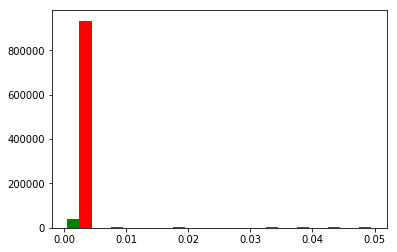

In [44]:
plt.hist([g['deal_probability'].values for key, g in train[['with_image', 'deal_probability']].groupby('with_image')], color=['g', 'r'], range=(0,0.05))

In [45]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

Стол б/у
item_id                                                      e61f6f63f315
user_id                                                      af140a5ba6db
region                                               Свердловская область
city                                                         Нижний Тагил
parent_category_name                                      Для дома и дачи
category_name                                           Мебель и интерьер
param_1                                                    Столы и стулья
param_2                                                               NaN
param_3                                                               NaN
title                                                            Стол б/у
description                  продаётся стол б/у раздвижной в сад на дачу.
price                                                                 300
item_seq_number                                                        44
activation_date              

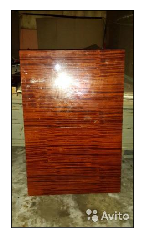

In [185]:
idx = np.random.choice(train[train.deal_probability>0.3].index)
data = train.iloc[idx]
print(data.title)
print(data)
if data['with_image']:
    im = open_image(TRATH/'jpg'/f'{data["image"]}.jpg')
    show_img(im)

In [196]:
active[(active.city==data.city) & (active.category_name==data.category_name) & (active.param_1==data.param_1)]

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type
26313,39def4762c44,c9a4d5738108,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Стол-тумба,Продам стол-тумбу б/у в хорошем состоянии.,600.0,112.0,2017-03-15,Company
70742,ca9626ea1218,f94d6859331f,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Офисная мебель,"Компьютерные столы, стулья, стол для переговор...",1000.0,114.0,2017-03-15,Private
142597,46ce317dadf7,e45211e9c464,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Новый Кухонный стол,"Новый кухонный стол, цвет бежевый металлик на ...",5000.0,35.0,2017-03-15,Company
597340,0e27dc4ad740,8574abd6b8e3,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Туалетный столик,Продам удобный и вместительный туалетный столи...,2500.0,29.0,2017-03-15,Private
615230,f7c6edd1b0e8,f34ea9e51604,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Садовая мебель(стол и лавки из оцилиндровки),Комплект состоит из стола и двух лавок.отшлифо...,17000.0,753.0,2017-03-15,Company
794464,4475b9ca92c5,636fe7b3fc84,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Овальный обеденный стол из массива берёзы,Материал:\tмассив березы/\nРазмер (мм):\t900х(...,34300.0,10.0,2017-03-15,Company
1048345,108e459a75bc,abd6f55bfbe9,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Стул антикварный старинный,стул из дерева резной.,49000.0,412.0,2017-03-15,Company
1073585,a5372de5fce3,6d855646b95b,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Лавка садовая,"Лавки садовые на заказ, любой сложности.Шикарн...",10.0,52.0,2017-03-15,Private
1164313,2e10b93be725,cba90acb9684,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Столы и стулья на металлическом каркасе,Нижнетагильская компания изготавливает столы и...,750.0,4.0,2017-03-15,Company
1242430,c8f61a4c1b39,403f41f42b18,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Стол-трансформер Дельфин,новый в собранном виде/\nсами установили на ко...,5900.0,86.0,2017-03-20,Private


In [174]:
np.sort(train.parent_category_name.unique())

array(['Бытовая электроника', 'Для бизнеса', 'Для дома и дачи', 'Животные', 'Личные вещи', 'Недвижимость',
       'Транспорт', 'Услуги', 'Хобби и отдых'], dtype=object)

In [175]:
np.sort(test.parent_category_name.unique())

array(['Бытовая электроника', 'Для бизнеса', 'Для дома и дачи', 'Животные', 'Личные вещи', 'Недвижимость',
       'Транспорт', 'Услуги', 'Хобби и отдых'], dtype=object)